# 📊 Real Estate Data Preprocessing with GCS Upload

"""
This script automates the data pipeline for real estate analytics:

✅ Downloads raw data from Google Cloud Storage (GCS)
✅ Cleans and preprocesses the data: fixing columns, handling missing values, formatting dates
✅ Optimizes data memory usage for efficient processing
✅ Saves the processed data in smaller chunks to manage large file sizes
✅ Uploads the cleaned data back to GCS for further analysis

The dataset contains:
- 28,276,227 entries
- 15 columns (Object: 8, Category: 5, Datetime: 1, Integer: 1)
- Total size: ~14.8 GB

This script is essential for efficiently handling large-scale real estate transaction data.
"""


In [17]:
# Real Estate Data Preprocessing and Upload Script
#
# Dataset Information:
# - Total Entries: 28,276,227
# - Columns: 15
# - File Size: ~14.8 GB
# - Data Types:
#   - Object: 8 columns
#   - Category: 5 columns
#   - Datetime: 1 column
#   - Integer: 1 column
#
# Description:
# This script is designed to automate the process of downloading, preprocessing, and uploading large real estate datasets.
# It handles the following tasks:
# 1. Downloading raw data from Google Cloud Storage (GCS).
# 2. Cleaning and preprocessing the data: fixing column names, handling missing values, formatting dates, and optimizing memory.
# 3. Saving processed data in smaller chunks to efficiently manage large file sizes.
# 4. Uploading the cleaned data back to GCS for further analysis and modeling.
#
# This script is structured to handle real estate transaction data from the UK, including information such as price, date of transfer, property type, and location details.
#
# Usage:
# Run this script on a Colab environment or any environment with access to GCS.
# Ensure that you have properly authenticated using Google Cloud credentials before running.
#
# Description:
# This script is designed to automate the process of downloading, preprocessing, and uploading large real estate datasets.
# It handles the following tasks:
# 1. Downloading raw data from Google Cloud Storage (GCS).
# 2. Cleaning and preprocessing the data: fixing column names, handling missing values, formatting dates, and optimizing memory.
# 3. Saving processed data in smaller chunks to efficiently manage large file sizes.
# 4. Uploading the cleaned data back to GCS for further analysis and modeling.
#
# This script is structured to handle real estate transaction data from the UK, including information such as price, date of transfer, property type, and location details.
#
# Usage:
# Run this script on a Colab environment or any environment with access to GCS.
# Ensure that you have properly authenticated using Google Cloud credentials before running.

In [7]:
from google.colab import auth
auth.authenticate_user()

In [8]:
import os
from google.cloud import storage

# Set your GCS bucket name and file path
bucket_name = "boothill2001-dataset"
gcs_path = "uk_property_data/202304.csv"
local_path = "data/raw/202304.csv"

# Initialize GCS client
client = storage.Client()

# Download the file from GCS
try:
    bucket = client.get_bucket(bucket_name)
    blob = bucket.blob(gcs_path)
    os.makedirs("data/raw", exist_ok=True)
    blob.download_to_filename(local_path)
    print(f"Data downloaded successfully from GCS to {local_path}!")
except Exception as e:
    print(f"Error downloading data: {e}")


Data downloaded successfully from GCS to data/raw/202304.csv!


In [9]:
import pandas as pd

# Load the downloaded file to verify
try:
    df = pd.read_csv(local_path)
    print(f"Data loaded successfully! Shape: {df.shape}")
    print(df.head())
except Exception as e:
    print(f"Error loading data: {e}")


Data loaded successfully! Shape: (28276227, 16)
   {F887F88E-7D15-4415-804E-52EAC2F10958}  70000  1995-07-07 00:00 MK15 9HP  \
0  {40FD4DF2-5362-407C-92BC-566E2CCE89E9}  44500  1995-02-03 00:00  SR6 0AQ   
1  {7A99F89E-7D81-4E45-ABD5-566E49A045EA}  56500  1995-01-13 00:00  CO6 1SQ   
2  {28225260-E61C-4E57-8B56-566E5285B1C1}  58000  1995-07-28 00:00  B90 4TG   
3  {444D34D7-9BA6-43A7-B695-4F48980E0176}  51000  1995-06-28 00:00  DY5 1SA   
4  {AE76CAF1-F8CC-43F9-8F63-4F48A2857D41}  17000  1995-03-10 00:00  S65 1QJ   

   D  N  F  31 Unnamed: 8     ALDRICH DRIVE         WILLEN  MILTON KEYNES  \
0  T  N  F  50        NaN       HOWICK PARK     SUNDERLAND     SUNDERLAND   
1  T  N  F  19        NaN  BRICK KILN CLOSE     COGGESHALL     COLCHESTER   
2  T  N  F  37        NaN  RAINSBROOK DRIVE        SHIRLEY       SOLIHULL   
3  S  N  F  59        NaN        MERRY HILL  BRIERLEY HILL  BRIERLEY HILL   
4  T  N  L  22        NaN     DENMAN STREET      ROTHERHAM      ROTHERHAM   

  MILTON KEYNE

In [10]:
# Display basic information
print("Data Information:")
df.info()

# Display the first 5 rows
print("First 5 rows:")
print(df.head())

# Check the columns
print("List of columns:")
print(df.columns)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276227 entries, 0 to 28276226
Data columns (total 16 columns):
 #   Column                                  Dtype 
---  ------                                  ----- 
 0   {F887F88E-7D15-4415-804E-52EAC2F10958}  object
 1   70000                                   int64 
 2   1995-07-07 00:00                        object
 3   MK15 9HP                                object
 4   D                                       object
 5   N                                       object
 6   F                                       object
 7   31                                      object
 8   Unnamed: 8                              object
 9   ALDRICH DRIVE                           object
 10  WILLEN                                  object
 11  MILTON KEYNES                           object
 12  MILTON KEYNES.1                         object
 13  MILTON KEYNES.2                         object
 14  A                             

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values[missing_values > 0])


Missing values:
MK15 9HP            45969
31                   4189
Unnamed: 8       24950367
ALDRICH DRIVE      447756
WILLEN           10085851
dtype: int64


In [16]:
import os
import pandas as pd
from google.cloud import storage

# Step 1: Download data from GCS
bucket_name = "boothill2001-dataset"
gcs_path = "uk_property_data/202304.csv"
local_path = "data/raw/202304.csv"

client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob(gcs_path)
os.makedirs("data/raw", exist_ok=True)
blob.download_to_filename(local_path)
print(f"Data downloaded successfully from GCS to {local_path}!")

# Step 2: Load data
df = pd.read_csv(local_path, low_memory=False)
print("Data loaded successfully! Shape:", df.shape)

# Step 3: Fix Column Names
fixed_columns = [
    'Transaction_ID', 'Price', 'Date_of_Transfer', 'Postcode', 'Property_Type',
    'Old/New', 'Duration', 'PAON', 'SAON', 'Street', 'Locality',
    'Town/City', 'District', 'County', 'PPDCategory_Type', 'Record_Status'
]

if len(df.columns) == len(fixed_columns):
    df.columns = fixed_columns
else:
    print(f"Column count mismatch: expected {len(fixed_columns)}, got {len(df.columns)}")

# Step 4: Drop Unnecessary Columns
drop_cols = ['Unnamed: 8', 'A', 'A.1']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# Step 5: Handle Missing Values
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)
df.loc[:, 'Postcode'] = df['Postcode'].fillna(df['Postcode'].mode()[0])
df.loc[:, 'PAON'] = df['PAON'].fillna(df['PAON'].mode()[0])
df.loc[:, 'Street'] = df['Street'].fillna('Unknown')

# Step 6: Format Date Column
df['Date_of_Transfer'] = pd.to_datetime(df['Date_of_Transfer'], errors='coerce')

# Step 7: Memory Optimization
df['Price'] = pd.to_numeric(df['Price'], errors='coerce', downcast='integer')
categorical_cols = ['Property_Type', 'Old/New', 'Duration', 'PPDCategory_Type', 'Record_Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("Optimized Data Information:")
print(df.info(memory_usage='deep'))

# Step 8: Save processed data in chunks
chunk_size = 1000000  # 1 million rows per file
os.makedirs('data/processed', exist_ok=True)

for i, chunk in enumerate(range(0, len(df), chunk_size)):
    chunk_df = df.iloc[chunk:chunk + chunk_size]
    file_name = f'data/processed/cleaned_real_estate_part_{i+1}.csv'
    chunk_df.to_csv(file_name, index=False)
    print(f"Saved chunk {i+1} to {file_name}")

# Step 9: Upload processed files to GCS
gcs_processed_folder = "uk_property_data/processed/"

for file_name in os.listdir('data/processed/'):
    local_file_path = os.path.join('data/processed/', file_name)
    gcs_file_path = gcs_processed_folder + file_name
    try:
        blob = bucket.blob(gcs_file_path)
        blob.upload_from_filename(local_file_path)
        print(f"Uploaded {file_name} to GCS at {gcs_file_path}")
    except Exception as e:
        print(f"Error uploading {file_name}: {e}")

print("All processed files uploaded successfully!")

Data downloaded successfully from GCS to data/raw/202304.csv!
Data loaded successfully! Shape: (28276227, 16)
Optimized Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28276227 entries, 0 to 28276226
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Transaction_ID    object        
 1   Price             int32         
 2   Date_of_Transfer  datetime64[ns]
 3   Postcode          object        
 4   Property_Type     category      
 5   Old/New           category      
 6   Duration          category      
 7   PAON              object        
 8   Street            object        
 9   Locality          object        
 10  Town/City         object        
 11  District          object        
 12  County            object        
 13  PPDCategory_Type  category      
 14  Record_Status     category      
dtypes: category(5), datetime64[ns](1), int32(1), object(8)
memory usage: 14.8 GB
None
Saved chunk 1 

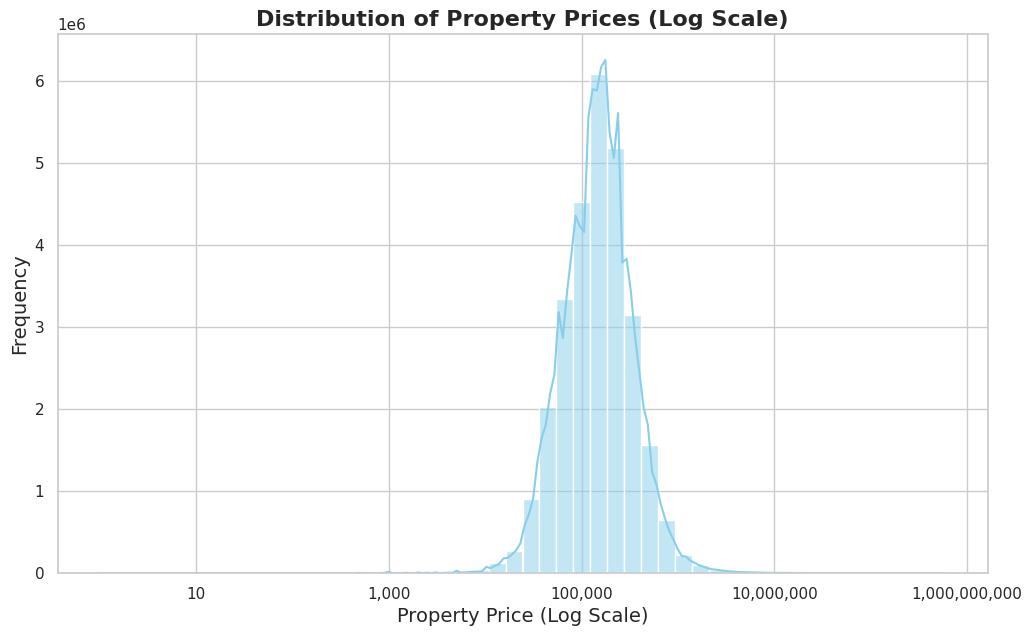

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Logarithmic transformation for better visualization
sns.histplot(df['Price'], bins=50, kde=True, log_scale=(True, False), color="skyblue")

# Formatting the x-axis for large numbers
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adding titles and labels
plt.title('Distribution of Property Prices (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Property Price (Log Scale)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()


<ipython-input-22-2171b553b071>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Property_Type', palette='pastel')


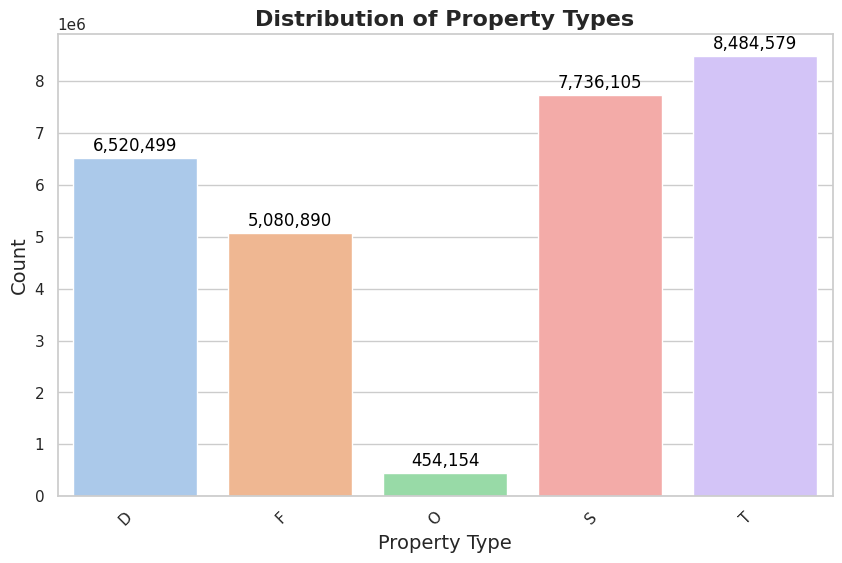

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting the property type distribution
ax = sns.countplot(data=df, x='Property_Type', palette='pastel')

# Adding title and labels
plt.title('Distribution of Property Types', fontsize=16, fontweight='bold')
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()



In [18]:
print(f"Average Property Price: {df['Price'].mean():,.2f}")
print(f"Top 5 Most Expensive Cities: {df.groupby('Town/City')['Price'].mean().nlargest(5)}")

Average Property Price: 218,130.50
Top 5 Most Expensive Cities: Town/City
GATWICK              2.823281e+07
THORNHILL            9.850000e+05
VIRGINIA WATER       9.315949e+05
CHALFONT ST GILES    8.414951e+05
COBHAM               7.364758e+05
Name: Price, dtype: float64


## 📌 Summary and Next Steps
- Data cleaned and preprocessed successfully.
- Major insights:
  - Top 5 cities with the highest average property price.
  - Most common property types.
- Next Steps:
  - Build predictive models for price estimation.
  - Explore temporal trends in property transactions.
